# Hierarchial Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mall.csv')

In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


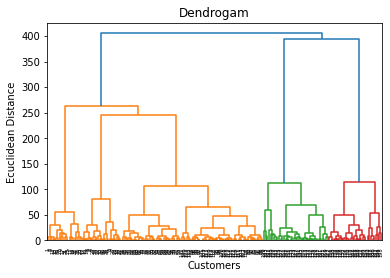

In [6]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

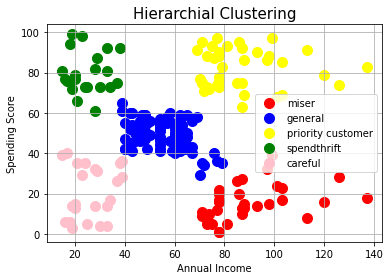

In [7]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'yellow', label = 'priority customer')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'green', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'pink', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Text Analysis and Topic Modelling

In [10]:
from spacy.tokens import DocBin

In [12]:
pip install ml_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import spacy

In [15]:
from ml_datasets import imdb

In [18]:
train_data,test_data=imdb()

In [19]:
print(train_data[0])

('I have never seen a worse movie.\n\n\n\nIt is possible to take a shootem up video game and make it into a decent movie.\n\n\n\nMistake 1: absolutely no connection to any of the characters. In this movie you don\'t bond with any of the characters because... you don\'t get a chance.\n\n\n\nThe only character that is sympathetic or even interesting is the Deck Hand: Salish as played by Clint Howard. Except for this unique character, the outcome of the movie is meaningless as all the characters were lifeless from the begining.\n\n\n\nMistake 2: the worst gunfight scene ever. I love gunfights. I love when the heros open up on the badguys and clean house. heck I even like to watch a badguy clean house sometimes. But this gunfight was weird I guess that the best way to describe it is "Apathetic" I\'ve seen people shoot with more feeling and emotion while PLAYING THE VIDEOGAME. In this movie it looked and felt like the "Actors" were simply walking through shooting everything that moved witho